## Лабораторная работа №5
Гармонических анализ временного ряда:
- Реализовать разложение исходных данных в ряд Фурье.
- Построить периодограмму, определить значимые гармоники
- Построить графики исходных данных, значимых гармоник и остатка (исходные данные минус значимые гармоники)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file_path = "data/CTD_22oc11_Channel+river.csv"
with open(data_file_path, "r") as f:
    df = pd.read_csv(f, sep=";")

df = df.iloc[:, 3:-11]

df = df.drop(columns=["Time", "Depth [m]"])


df.head(n=10)

,Date,Temp
0,11.10.2022,13.411
1,11.10.2022,13.411
2,11.10.2022,13.412
3,11.10.2022,13.413
4,11.10.2022,13.413
5,11.10.2022,13.414
6,11.10.2022,13.414
7,11.10.2022,13.415
8,11.10.2022,13.414
9,11.10.2022,13.415


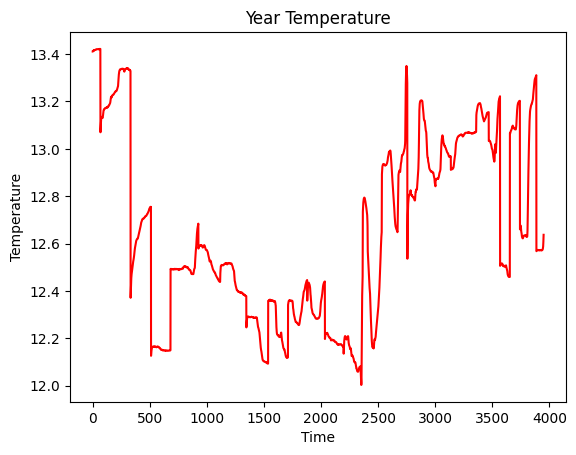

In [16]:
Y = df["Temp"]
n = len(Y)
X = np.linspace(1, n, n)
graph, (plot1) = plt.subplots(1, 1)
plot1.plot(X, Y, "r")

plt.xlabel("Time")
plt.ylabel("Temperature")
plot1.set_title("Year Temperature")

plt.show()

In [17]:
def linear_regression_coefficients(X, Y):
    num_points = len(X)
    sum_X = sum(X)
    sum_Y = sum(Y)
    sum_XY = sum(x * y for x, y in zip(X, Y))
    sum_XX = sum(x * x for x in X)

    coefficient_matrix = np.array([[sum_XX, sum_X], [sum_X, num_points]])
    constants = np.array([sum_XY, sum_Y])

    return np.linalg.solve(coefficient_matrix, constants)

In [18]:
a, b = linear_regression_coefficients(X, Y)
linear = lambda x: a * x + b

In [19]:
a, b

(7.209503311136849e-05, 12.505716262088537)

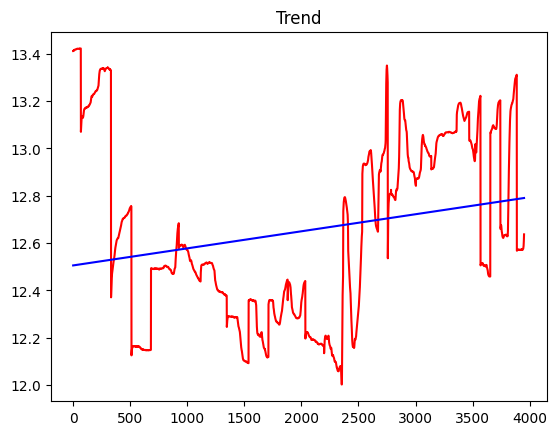

In [20]:
graph, (plot1) = plt.subplots(1, 1)

plot1.plot(X, Y, "r")
plot1.plot(X, [linear(xi) for xi in X], "b")

plot1.set_title("Trend")

plt.show()

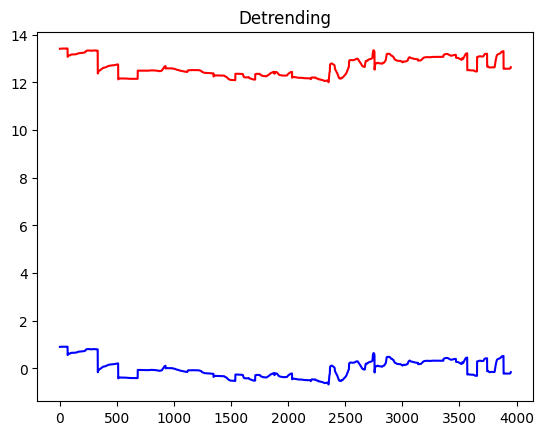

In [21]:
graph, (plot1) = plt.subplots(1, 1)
Z = [Y[i] - linear(X[i]) for i in range(n)]

plot1.plot(X, Y, "r")
plot1.plot(X, Z, "b")

plot1.set_title("Detrending")

plt.show()

n = 3950, n/10 = 395.0 (year), n/20 = 197.5 (half year)


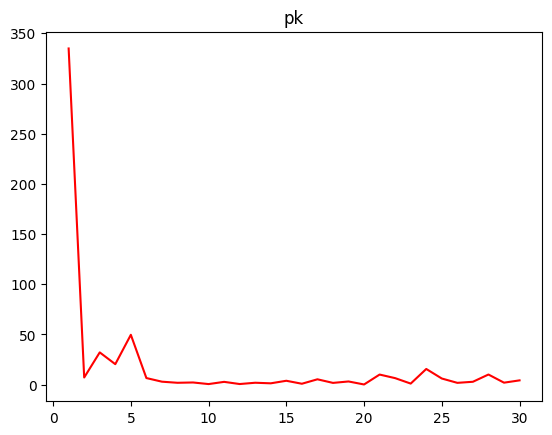

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_A0(Y):
    return sum(Y) * 2 / len(Y)


def calculate_Ak(Y, k):
    return sum(Y[i - 1] * np.cos(2 * np.pi * k * i / len(Y)) for i in range(1, len(Y))) * 2 / len(Y)


def calculate_Bk(Y, k):
    return sum(Y[i - 1] * np.sin(2 * np.pi * k * i / len(Y)) for i in range(1, len(Y))) * 2 / len(Y)


def calculate_Pk(A, B, k):
    return (A[k] ** 2 + B[k] ** 2) * len(Y) / 2


n = len(Y)
A = [0] + [calculate_Ak(Y, k) for k in range(1, 30 + 1)]
B = [0] + [calculate_Bk(Y, k) for k in range(1, 30 + 1)]

P = [calculate_Pk(A, B, k) for k in range(1, 30 + 1)]

fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(1, 30, 30), P, "r")
ax.set_title("pk")

print(f"n = {n}, n/10 = {n/10} (year), n/20 = {n/20} (half year)")

plt.show()

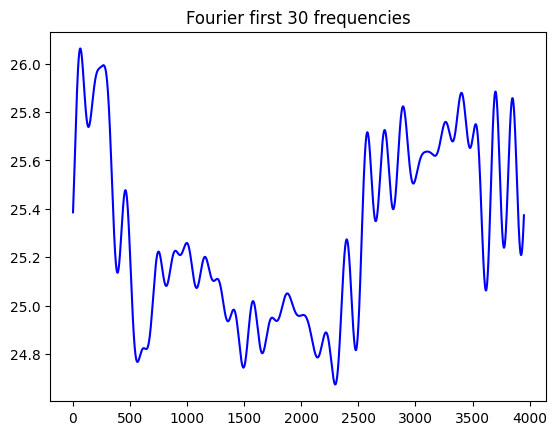

In [23]:
def Fourier(Y, i):
    a0 = calculate_A0(Y)
    s = 0
    for k in range(1, 30):
        s += A[k] * np.cos(2 * np.pi * i * k / n) + B[k] * np.sin(2 * np.pi * i * k / n)
    return a0 + s


graph, (plot1) = plt.subplots(1, 1)
plot1.plot(X, [Fourier(Y, i) for i in range(n)], "b")
plot1.set_title("Fourier first 30 frequencies")
plt.show()

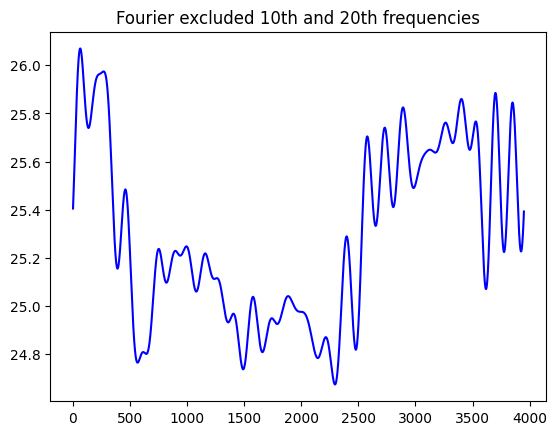

In [26]:
def fourier_exclude(Y, i, exclude):
    a0 = calculate_A0(Y)
    s = 0
    for k in range(1, 30):
        if k in exclude:
            continue
        s += A[k] * np.cos(2 * np.pi * i * k / n) + B[k] * np.sin(2 * np.pi * i * k / n)
    return a0 + s


def fourier_include(Y, i, include):
    a0 = calculate_A0(Y)
    s = 0
    for k in range(1, 30):
        if not k in include:
            continue
        s += A[k] * np.cos(2 * np.pi * i * k / n) + B[k] * np.sin(2 * np.pi * i * k / n)
    return a0 + s


graph, (plot1) = plt.subplots(1, 1)
plot1.plot(X, [fourier_exclude(Y, i, [10, 20]) for i in range(n)], "b")
plot1.set_title("Fourier excluded 10th and 20th frequencies")

plt.show()

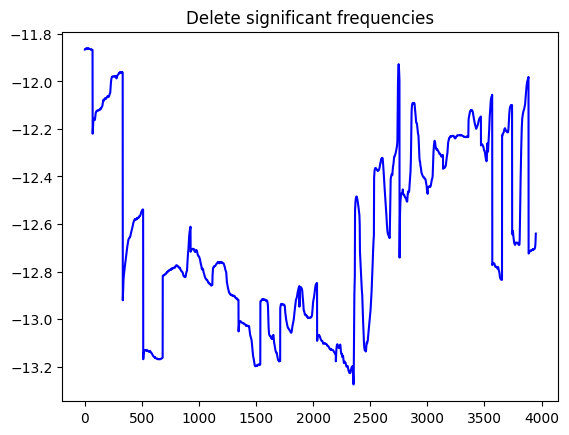

In [25]:
graph, (plot1) = plt.subplots(1, 1)

plot1.plot(X, [Y[i] - fourier_include(Y, i, [10, 20]) for i in range(n)], "b")
plot1.set_title("Delete significant frequencies")

plt.show()